In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Grab and process the raw data.
training_text = ('imdb_labelled.txt')
# training_text = ('amazon_cells_labelled.txt')
text_raw = pd.read_csv(training_text, delimiter= '\t', header=None)
text_raw.columns = ['message', 'positive']

In [3]:
keywords = ['crap', 'doomed', 'mediocre', 'predictable', 'lazy', 'disappointed', 'dissapointment', 'annoying',
            'unnecessary', 'horrendus', 'bad', 'shallow', 'insincere', 'lousy', 'pretentious', 'unsatisfactory',
            'hate', 'sucked', 'awful', 'disliked', 'appalling', 'torture', 'atrocity', 'stupid', 'waste', 'unremarkable',
            'poor', 'trash', 'forced', 'lame', 'ridiculous', 'weak', 'bore', 'bored', 'boring', 'pointless']

for key in keywords:
    text_raw[str(key)] = text_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [4]:
text_raw['positive'] = (text_raw['positive'] == 1)

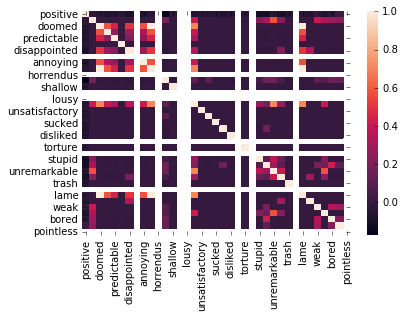

In [5]:
sns.heatmap(text_raw.corr())

In [6]:
data = text_raw[keywords]
target = text_raw['positive']

In [7]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 291
